In [2]:
import data_loader
import LSTM_func
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# extract the place holder
#place_holder = os.getcwd()
##files  = ['/DATASET3_price.csv','/DATASET3_sales.csv','/DATASET3_stock.csv',
         # '/Dataset3_Product.psv', 
         #'/Dataset3_Product Hierarchy.psv']
#name = ['price','sales','stock','product','hie']

# load the data
#df_dic = data_loader.loading(files,name,place_holder)
# turn the data into the correct format
# Row = time(week)
# Column = products
# Entries = sales quantity 
sales = pd.read_csv('/Users/ball4308/Desktop/MSc BA/Capstone /Premium LSTM/DATASET3_sales.csv',delimiter='|')
#sales = data_loader.useful_info_extractor(sales,df_dic)
data = pd.pivot_table(sales, values='sales_quantity', index=['reporting_date'],
              columns=['product_bkey1'], fill_value=0)

In [4]:
data.head()

product_bkey1,0009a30d22fc5b35e1f9,000ad8cf49a3a31e5437,000add5e51ff7efc445d,001648559c7514990ed5,00285c25e66248cab188,002cdb304d9d3400c375,002e326c29e9b4053057,00387ee71006e9791306,003cfdf609758fd52272,004637014aef28480337,...,ffc76a29ed3444142087,ffdb524264dbf3455820,ffdeaa8978a0f06664fc,ffe0e5f94f6197287eec,ffe16e72704f84c1999a,ffe29429d29faf1522d2,ffe33f57fcf0b4a6ec8b,ffe4795605677c08e1d6,ffe850a8b3179f77b68f,ffefa379e7368793deb9
reporting_date,,,,,,,,,,,,,,,,,,,,,
01/02/2020,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
01/06/2019,1,2,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
01/07/2017,0,59,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
01/09/2018,0,38,0,1,0,0,0,0,0,0,...,0,0,0,27,0,0,0,0,0,0
01/12/2018,0,13,1,0,0,0,0,0,0,0,...,0,10,0,4,0,0,0,0,0,0


Train on 29 samples, validate on 8 samples
Epoch 1/256
29/29 [==============================] - 6s 204ms/step - loss: 2.7619 - val_loss: 18.4508
Epoch 2/256
29/29 [==============================] - 4s 133ms/step - loss: 17.5682 - val_loss: 38.3704
Epoch 3/256
29/29 [==============================] - 2s 81ms/step - loss: 35.9113 - val_loss: 16.5759
Epoch 4/256
29/29 [==============================] - 3s 89ms/step - loss: 13.3376 - val_loss: 18.7453
Epoch 5/256
29/29 [==============================] - 3s 103ms/step - loss: 11.0906 - val_loss: 8.6209
Epoch 6/256
29/29 [==============================] - 5s 182ms/step - loss: 13.5174 - val_loss: 11.7406
Epoch 7/256
29/29 [==============================] - 3s 113ms/step - loss: 12.9276 - val_loss: 11.1155
Epoch 8/256
29/29 [==============================] - 3s 120ms/step - loss: 12.9160 - val_loss: 9.1917
Epoch 9/256
29/29 [==============================] - 3s 117ms/step - loss: 13.8808 - val_loss: 8.1847
Epoch 10/256
29/29 [================

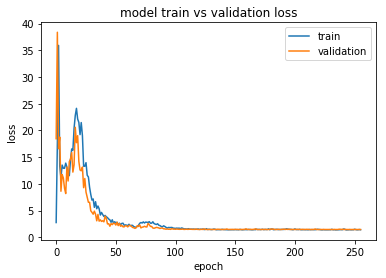

Mean absolute error of 12 weeks forecasting: 1.4242880779520064
Root mean squared error of 12 weeks forecasting: 8.211468088410124


In [5]:
n_steps_in = 40
n_steps_out = 12 
e_poches = 256
model, yhat_change, valid = LSTM_func.forecaster_train(data,n_steps_in,n_steps_out,e_poches)

In [11]:
y_actual = valid.reshape(1,12,9854)

In [12]:
yhat_change.max()

3.2385352

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(r2_score(valid,yhat_change))
print(mean_absolute_error(valid,yhat_change))

-0.20689042703697602
1.4242880779520064


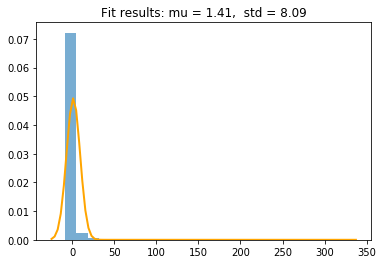

337.14956827876154
-24.427222771057856


In [14]:
from scipy.stats import norm
x = y_actual.flatten() - yhat_change.flatten()
mu, std = norm.fit(x)
plt.hist(x,bins = 25, density=True, alpha = 0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'orange', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()
print(max(x))
print(min(x))

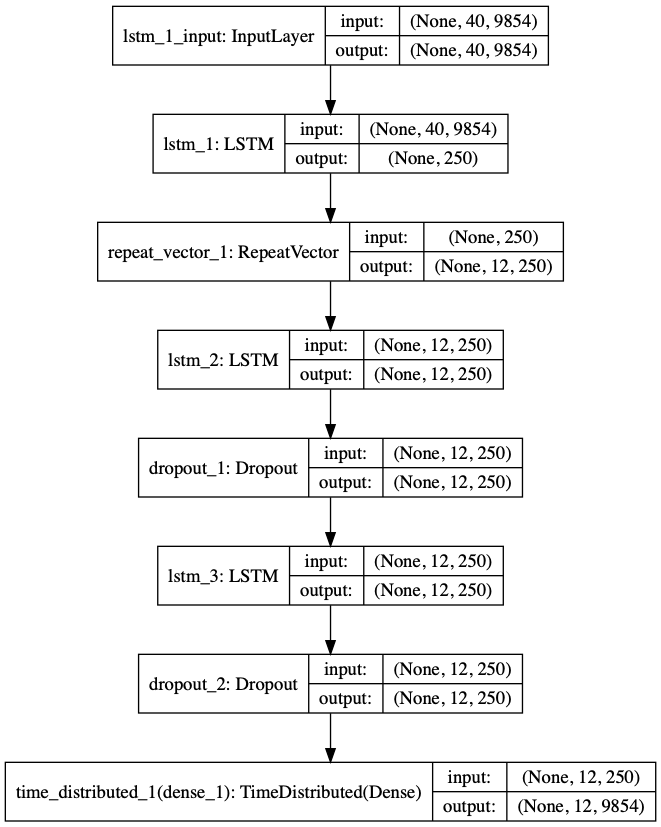

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)